In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import gridspec
from IPython.display import display, HTML
from math import pi
plt.style.use('fivethirtyeight')

%matplotlib inline

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import linear_model, tree, svm
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATA_PATH1 = '/content/drive/MyDrive/project/fifa_data_2015_to_2020.csv'
df= pd.read_csv(DATA_PATH1, sep=',')
display(df.head(5))

,sofifa_id,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,...,physic,attack_oa,skill_oa,movements_oa,power_oa,mentality_oa,defending_oa,gk_oa,trait_coef,year
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,FC Barcelona,93,...,63.0,83.0,90.0,94.0,75.0,54.0,22.0,11.0,16,2015
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,1985-02-05,185,80,Portugal,Real Madrid,92,...,79.0,88.0,85.0,84.0,90.0,58.0,25.0,12.0,18,2015
2,9014,A. Robben,Arjen Robben,30,1984-01-23,180,80,Netherlands,FC Bayern München,90,...,64.0,79.0,86.0,93.0,78.0,59.0,28.0,10.0,20,2015
3,41236,Z. Ibrahimović,Zlatan Ibrahimović,32,1981-10-03,195,95,Sweden,Paris Saint-Germain,90,...,86.0,84.0,84.0,73.0,85.0,60.0,28.0,12.0,20,2015
4,167495,M. Neuer,Manuel Neuer,28,1986-03-27,193,92,Germany,FC Bayern München,90,...,0.0,28.0,29.0,62.0,57.0,25.0,25.0,90.0,8,2015


In [ ]:
df.columns

Index(['sofifa_id', 'short_name', 'long_name', 'age', 'dob', 'height_cm',
       'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur',
       'wage_eur', 'preferred_foot', 'international_reputation', 'weak_foot',
       'skill_moves', 'work_rate', 'body_type', 'team_position',
       'team_jersey_number', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attack_oa', 'skill_oa', 'movements_oa',
       'power_oa', 'mentality_oa', 'defending_oa', 'gk_oa', 'trait_coef',
       'year'],
      dtype='object')

In [ ]:
def get_year(df,year):
    temp_data = df.query('year==@year').reset_index()
    return temp_data

In [ ]:
df_2015 = get_year(df,2015)
df_2016 = get_year(df,2016)
df_2017 = get_year(df,2017)
df_2018 = get_year(df,2018)
df_2019 = get_year(df,2019)
df_2020 = get_year(df,2020)
l_df=[df_2015,df_2016,df_2017,df_2018,df_2019,df_2020]

Overall rating distribution by year

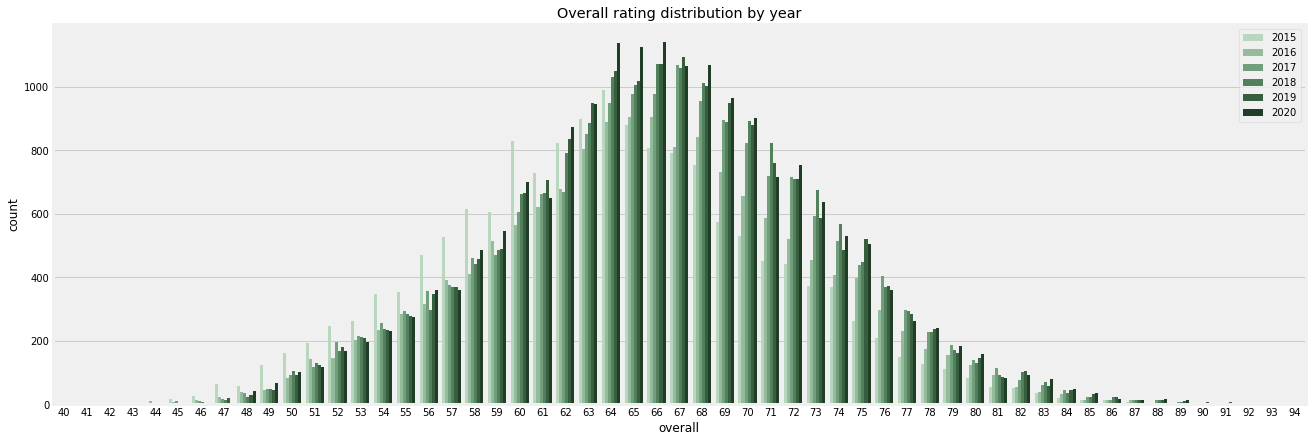

In [ ]:
plt.figure(figsize = (20,7))
sb.countplot(data = df, x = 'overall', hue='year', palette = sb.cubehelix_palette(6, start=5, rot=0, dark=0.2, light=.8, reverse=False))
plt.title('Overall rating distribution by year')
plt.legend(loc=1);

Comparison of the top 5 players from 2015 to 2020

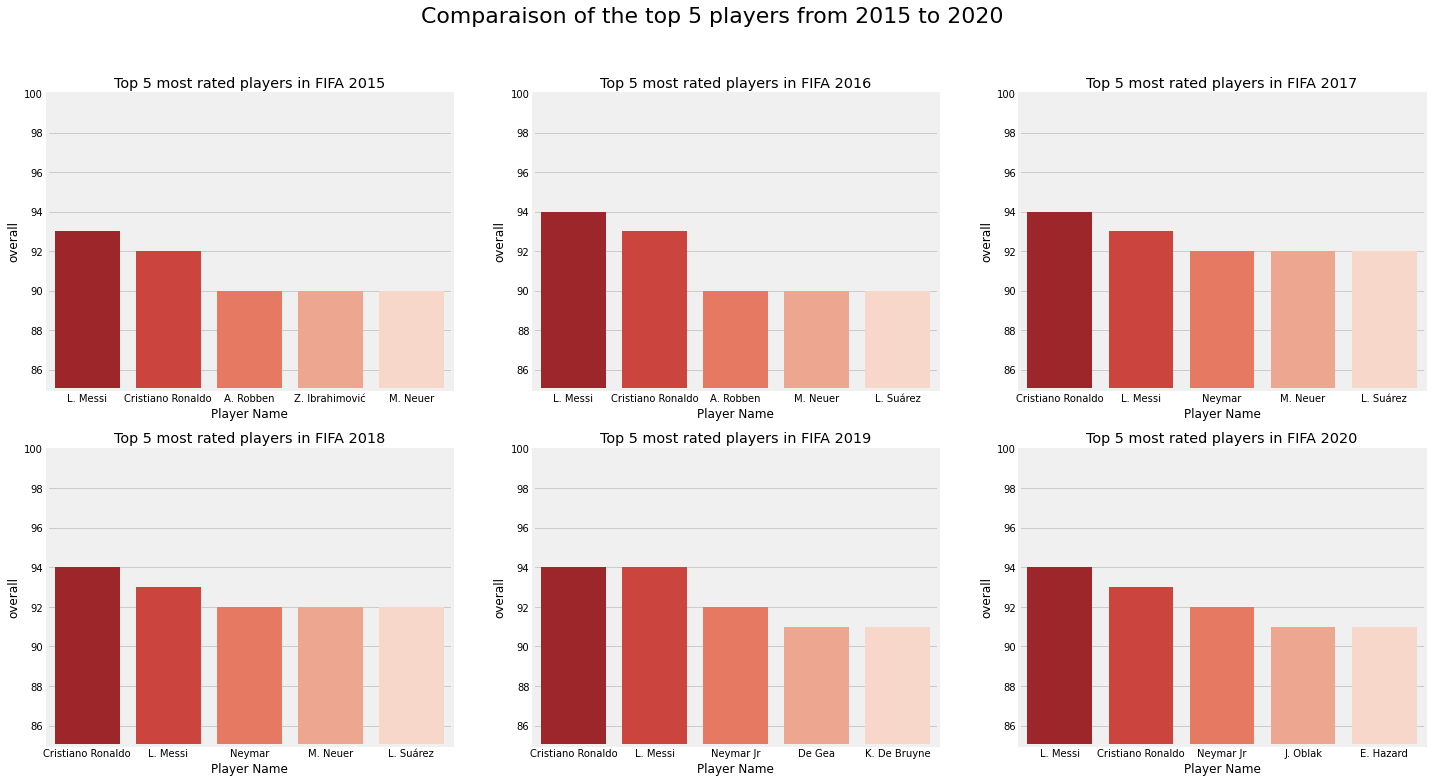

In [ ]:
l=[]
for i in l_df:
    temp = i.head(5)[['short_name','overall','year']]
    l.append(temp)
fig = plt.figure(figsize=(22,12))
plt.suptitle('Comparaison of the top 5 players from 2015 to 2020',fontsize=22)
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=0.5)
plt.subplot(231)
sb.barplot(data=l[0], x='short_name', y='overall', palette='Reds_r')
plt.ylim(85, 100)
plt.xlabel('Player Name')
plt.title('Top 5 most rated players in FIFA 2015')
plt.subplot(232)
sb.barplot(data=l[1], x='short_name', y='overall', palette='Reds_r')
plt.ylim(85, 100)
plt.xlabel('Player Name')
plt.title('Top 5 most rated players in FIFA 2016')
plt.subplot(233)
sb.barplot(data=l[2], x='short_name', y='overall', palette='Reds_r')
plt.ylim(85, 100)
plt.xlabel('Player Name')
plt.title('Top 5 most rated players in FIFA 2017')
plt.subplot(234)
sb.barplot(data=l[3], x='short_name', y='overall', palette='Reds_r')
plt.ylim(85, 100)
plt.xlabel('Player Name')
plt.title('Top 5 most rated players in FIFA 2018')
plt.subplot(235)
sb.barplot(data=l[4], x='short_name', y='overall', palette='Reds_r')
plt.ylim(85, 100)
plt.xlabel('Player Name')
plt.title('Top 5 most rated players in FIFA 2019')
plt.subplot(236)
sb.barplot(data=l[5], x='short_name', y='overall', palette='Reds_r')
plt.ylim(85, 100)
plt.xlabel('Player Name')
plt.title('Top 5 most rated players in FIFA 2020');

Best overall rating for each position by year

In [ ]:
def get_player_noGK(df):
    idx_df_gk = list(df.query('pace==0').index)
    df_no_GK = df.drop(idx_df_gk)
    return df_no_GK

In [ ]:
def get_best_by_position(df):
    lis=[]
    temp = df.groupby(['team_position'])[['overall']].max()
    for i in list(temp.index):
        overall = temp.loc[i][0]
        best_i = df.query('team_position==@i & overall==@overall').iloc[0]
        lis.append(best_i)
    best_pos = pd.DataFrame(lis)
    return best_pos

In [ ]:
lis=[]
lis.append(get_best_by_position(df_2015))
lis.append(get_best_by_position(df_2016))
lis.append(get_best_by_position(df_2017))
lis.append(get_best_by_position(df_2018))
lis.append(get_best_by_position(df_2019))
lis.append(get_best_by_position(df_2020))
best_pos = pd.concat(lis, ignore_index=True)

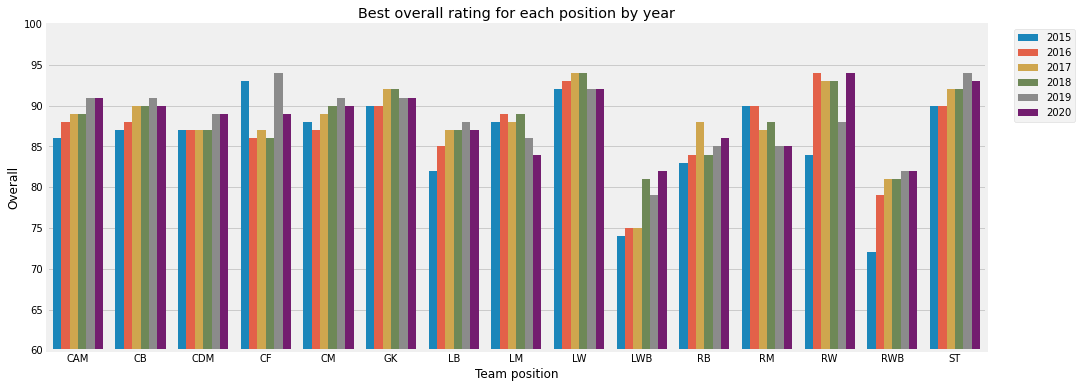

In [ ]:
plt.figure(figsize=(15,6))
plt.title('Best overall rating for each position by year')
sb.barplot(data=best_pos, x='team_position', y='overall', hue='year')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
plt.xlabel('Team position')
plt.ylabel('Overall')
plt.ylim(60,100);

Best Players in every position in each year

In [ ]:
gb = best_pos.groupby('team_position')    
l = [gb.get_group(x) for x in gb.groups]
for i in range(15):
  display(l[i].loc[:,['short_name','team_position','overall','club','nationality','year']])

,short_name,team_position,overall,club,nationality,year
0,J. Rodríguez,CAM,86,Real Madrid,Colombia,2015
15,David Silva,CAM,88,Manchester City,Spain,2016
30,M. Özil,CAM,89,Arsenal,Germany,2017
45,K. De Bruyne,CAM,89,Manchester City,Belgium,2018
60,K. De Bruyne,CAM,91,Manchester City,Belgium,2019
75,K. De Bruyne,CAM,91,Manchester City,Belgium,2020


,short_name,team_position,overall,club,nationality,year
1,Sergio Ramos,CB,87,Real Madrid,Spain,2015
16,Thiago Silva,CB,88,Paris Saint-Germain,Brazil,2016
31,J. Boateng,CB,90,FC Bayern München,Germany,2017
46,Sergio Ramos,CB,90,Real Madrid,Spain,2018
61,Sergio Ramos,CB,91,Real Madrid,Spain,2019
76,V. van Dijk,CB,90,Liverpool,Netherlands,2020


,short_name,team_position,overall,club,nationality,year
2,P. Lahm,CDM,87,FC Bayern München,Germany,2015
17,P. Lahm,CDM,87,FC Bayern München,Germany,2016
32,Sergio Busquets,CDM,87,FC Barcelona,Spain,2017
47,N. Kanté,CDM,87,Chelsea,France,2018
62,N. Kanté,CDM,89,Chelsea,France,2019
77,N. Kanté,CDM,89,Chelsea,France,2020


,short_name,team_position,overall,club,nationality,year
3,L. Messi,CF,93,FC Barcelona,Argentina,2015
18,T. Müller,CF,86,FC Bayern München,Germany,2016
33,T. Müller,CF,87,FC Bayern München,Germany,2017
48,D. Mertens,CF,86,Napoli,Belgium,2018
63,L. Messi,CF,94,FC Barcelona,Argentina,2019
78,A. Griezmann,CF,89,FC Barcelona,France,2020


,short_name,team_position,overall,club,nationality,year
4,B. Schweinsteiger,CM,88,FC Bayern München,Germany,2015
19,T. Kroos,CM,87,Real Madrid,Germany,2016
34,L. Modrić,CM,89,Real Madrid,Croatia,2017
49,T. Kroos,CM,90,Real Madrid,Germany,2018
64,L. Modrić,CM,91,Real Madrid,Croatia,2019
79,L. Modrić,CM,90,Real Madrid,Croatia,2020


,short_name,team_position,overall,club,nationality,year
5,M. Neuer,GK,90,FC Bayern München,Germany,2015
20,M. Neuer,GK,90,FC Bayern München,Germany,2016
35,M. Neuer,GK,92,FC Bayern München,Germany,2017
50,M. Neuer,GK,92,FC Bayern München,Germany,2018
65,De Gea,GK,91,Manchester United,Spain,2019
80,J. Oblak,GK,91,Atlético Madrid,Slovenia,2020


,short_name,team_position,overall,club,nationality,year
6,D. Alaba,LB,82,FC Bayern München,Austria,2015
21,D. Alaba,LB,85,FC Bayern München,Austria,2016
36,D. Alaba,LB,87,FC Bayern München,Austria,2017
51,Marcelo,LB,87,Real Madrid,Brazil,2018
66,Marcelo,LB,88,Real Madrid,Brazil,2019
81,Jordi Alba,LB,87,FC Barcelona,Spain,2020


,short_name,team_position,overall,club,nationality,year
7,E. Hazard,LM,88,Chelsea,Belgium,2015
22,E. Hazard,LM,89,Chelsea,Belgium,2016
37,E. Hazard,LM,88,Chelsea,Belgium,2017
52,A. Sánchez,LM,89,Arsenal,Chile,2018
67,I. Perišić,LM,86,Inter,Croatia,2019
82,K. Coman,LM,84,FC Bayern München,France,2020


,short_name,team_position,overall,club,nationality,year
8,Cristiano Ronaldo,LW,92,Real Madrid,Portugal,2015
23,Cristiano Ronaldo,LW,93,Real Madrid,Portugal,2016
38,Cristiano Ronaldo,LW,94,Real Madrid,Portugal,2017
53,Cristiano Ronaldo,LW,94,Real Madrid,Portugal,2018
68,Neymar Jr,LW,92,Paris Saint-Germain,Brazil,2019
83,Neymar Jr,LW,92,Paris Saint-Germain,Brazil,2020


,short_name,team_position,overall,club,nationality,year
9,M. Layún,LWB,74,Club América,Mexico,2015
24,C. Molinaro,LWB,75,Torino,Italy,2016
39,C. Molinaro,LWB,75,Torino,Italy,2017
54,Marcos Alonso,LWB,81,Chelsea,Spain,2018
69,Jonny,LWB,79,Wolverhampton Wanderers,Spain,2019
84,N. Schulz,LWB,82,Borussia Dortmund,Germany,2020


,short_name,team_position,overall,club,nationality,year
10,Dani Alves,RB,83,FC Barcelona,Brazil,2015
25,Dani Alves,RB,84,FC Barcelona,Brazil,2016
40,P. Lahm,RB,88,FC Bayern München,Germany,2017
55,Carvajal,RB,84,Real Madrid,Spain,2018
70,J. Kimmich,RB,85,FC Bayern München,Germany,2019
85,J. Kimmich,RB,86,FC Bayern München,Germany,2020


,short_name,team_position,overall,club,nationality,year
11,A. Robben,RM,90,FC Bayern München,Netherlands,2015
26,A. Robben,RM,90,FC Bayern München,Netherlands,2016
41,A. Robben,RM,87,FC Bayern München,Netherlands,2017
56,A. Robben,RM,88,FC Bayern München,Netherlands,2018
71,A. Robben,RM,85,FC Bayern München,Netherlands,2019
86,Koke,RM,85,Atlético Madrid,Spain,2020


,short_name,team_position,overall,club,nationality,year
12,A. Sánchez,RW,84,Arsenal,Chile,2015
27,L. Messi,RW,94,FC Barcelona,Argentina,2016
42,L. Messi,RW,93,FC Barcelona,Argentina,2017
57,L. Messi,RW,93,FC Barcelona,Argentina,2018
72,M. Salah,RW,88,Liverpool,Egypt,2019
87,L. Messi,RW,94,FC Barcelona,Argentina,2020


,short_name,team_position,overall,club,nationality,year
13,A. Elmohamady,RWB,72,Hull City,Egypt,2015
28,Bruno Peres,RWB,79,Torino,Brazil,2016
43,Bruno Peres,RWB,81,Roma,Brazil,2017
58,Mário Fernandes,RWB,81,PFC CSKA Moscow,Russia,2018
73,Mário Fernandes,RWB,82,PFC CSKA Moscow,Russia,2019
88,Mário Fernandes,RWB,82,PFC CSKA Moscow,Russia,2020


,short_name,team_position,overall,club,nationality,year
14,Z. Ibrahimović,ST,90,Paris Saint-Germain,Sweden,2015
29,L. Suárez,ST,90,FC Barcelona,Uruguay,2016
44,L. Suárez,ST,92,FC Barcelona,Uruguay,2017
59,L. Suárez,ST,92,FC Barcelona,Uruguay,2018
74,Cristiano Ronaldo,ST,94,Juventus,Portugal,2019
89,Cristiano Ronaldo,ST,93,Juventus,Portugal,2020


# Player overall rating prediction

In [ ]:
# Construction of the features dataframe for the regression model

years=[2019,2018,2017,2016,2015]
features_selected = ['age','wage_eur', 'value_eur','international_reputation', 'pace','skill_moves' ,'shooting', 'passing', 'dribbling',
            'defending', 'physic','skill_oa', 'attack_oa', 'movements_oa', 'power_oa', 'mentality_oa', 'gk_oa',
            'defending_oa',  'trait_coef','year']

ols_xdata = df.query('year in @years')[features_selected].copy()
ols_ydata = df.query('year in @years')['overall'].copy()

ols_xdata.loc[ols_xdata.value_eur==0,'value_eur'] = ols_xdata['value_eur'].mean()
ols_xdata.loc[ols_xdata.wage_eur==0,'wage_eur'] = ols_xdata['wage_eur'].mean()

ols_xdata['isGK'] = (ols_xdata['pace']==0).astype(int)
cols = list(ols_xdata.columns)
ols_xdata

,age,wage_eur,value_eur,international_reputation,pace,skill_moves,shooting,passing,dribbling,defending,...,skill_oa,attack_oa,movements_oa,power_oa,mentality_oa,gk_oa,defending_oa,trait_coef,year,isGK
0,27,9041.502956,1.758932e+06,5,93.0,4,89.0,86.0,96.0,27.0,...,90.0,83.0,94.0,75.0,54.0,11.0,22.0,16,2015,0
1,29,9041.502956,1.758932e+06,5,93.0,5,93.0,81.0,91.0,32.0,...,85.0,88.0,84.0,90.0,58.0,12.0,25.0,18,2015,0
2,30,9041.502956,1.758932e+06,5,93.0,4,86.0,83.0,92.0,32.0,...,86.0,79.0,93.0,78.0,59.0,10.0,28.0,20,2015,0
3,32,9041.502956,1.758932e+06,5,76.0,4,91.0,81.0,86.0,34.0,...,84.0,84.0,73.0,85.0,60.0,12.0,28.0,20,2015,0
4,28,9041.502956,1.758932e+06,5,0.0,1,0.0,0.0,0.0,0.0,...,29.0,28.0,62.0,57.0,25.0,90.0,25.0,8,2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82712,19,1000.000000,6.000000e+04,1,52.0,2,32.0,46.0,45.0,46.0,...,39.0,38.0,55.0,45.0,43.0,10.0,46.0,0,2019,0
82713,18,1000.000000,6.000000e+04,1,64.0,2,43.0,40.0,52.0,23.0,...,42.0,41.0,61.0,54.0,37.0,11.0,22.0,0,2019,0
82714,20,1000.000000,6.000000e+04,1,81.0,2,35.0,47.0,49.0,44.0,...,42.0,41.0,71.0,49.0,44.0,11.0,44.0,0,2019,0
82715,19,1000.000000,4.000000e+04,1,63.0,2,42.0,38.0,50.0,41.0,...,36.0,42.0,62.0,55.0,42.0,13.0,41.0,0,2019,0


In [ ]:
# Adding 2nd degree polynomial features to make the regression model more accurate

polynomial = PolynomialFeatures(2, include_bias=False)
ols_xdata = polynomial.fit_transform(ols_xdata)

In [ ]:
# Train/Test data split

#xtrain, xtest, ytrain, ytest = train_test_split( ols_xdata, ols_ydata, test_size=0.2, shuffle=True, random_state=42)
xtrain,ytrain=ols_xdata,ols_ydata

display((xtrain.shape, ytrain.shape))

((82717, 252), (82717,))

In [ ]:

x_2020 = df.query('year ==2020')[features_selected].copy()
x_2020['isGK'] = (x_2020['pace']==0).astype(int)
x_2020 = polynomial.fit_transform(x_2020)
y_2020 = np.array(df.query('year==2020')['overall'].copy()).flatten()
regression = linear_model.LinearRegression()
regression.fit(xtrain, ytrain)
ypred = regression.predict(x_2020)
predicted_2020 = np.round(regression.predict(x_2020)).astype(int)

In [ ]:
print('Mean squared error: %.2f' % mean_squared_error(y_2020, predicted_2020))
print('Coefficient of determination: %.2f'% r2_score(y_2020, predicted_2020))

Mean squared error: 2.04
Coefficient of determination: 0.96


In [ ]:
# Choosing a player from the dataset

def get_player(df,features_selected):
    player= df.sample(1)
    player_x = player[features_selected].copy()
    player_x['isGK'] = (player_x['pace']==0).astype(int)
    player_x= polynomial.fit_transform(player_x)
    player_y = np.array(player['overall'].copy())
    return player_x,player_y

In [ ]:
#Predicting the overall rating of the random player
player_x,player_y = get_player(df, features_selected)
estimated_y = regression.predict(player_x)
print('Actual value y=',int(player_y), 'Predicted value=', int(np.round(estimated_y)))

Actual value y= 70 Predicted value= 68


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


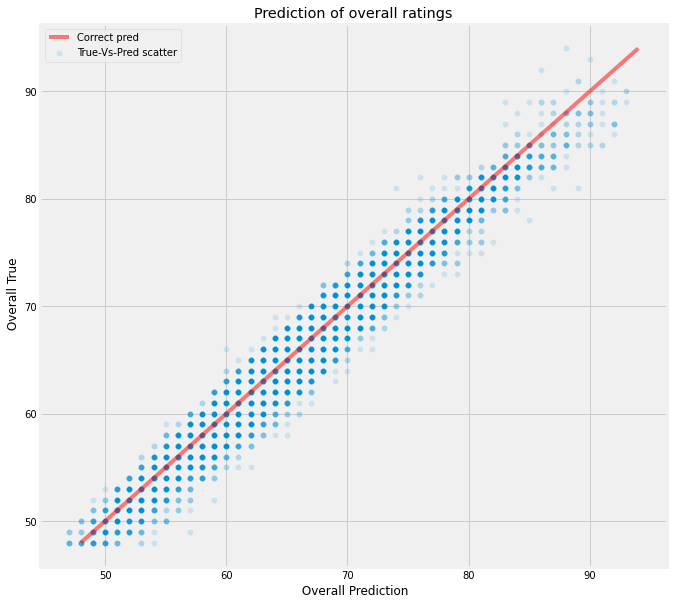

In [ ]:
plt.figure(figsize=(10,10))
sb.scatterplot(predicted_2020, y_2020, alpha=0.15)
plt.plot(y_2020, y_2020, color='r', alpha=0.5)
plt.legend(['Correct pred','True-Vs-Pred scatter'])
plt.title('Prediction of overall ratings')
plt.xlabel(' Overall Prediction')
plt.ylabel(' Overall True');